In [1]:
import pandas as pd #data manipulation and analysis.
import numpy as np #adding support for large, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt #plotting library for the Python programming language and its numerical 
                                #mathematics extension NumPy
import seaborn as sns # Python data visualization library based on matplotlib
from sklearn.feature_selection import SelectKBest #Using SelectKBest library to select the best K features 
                                                  #based on chi square scores
from sklearn.feature_selection import chi2
from sklearn.svm import SVC #library for Support Vector Machine
from sklearn.metrics import classification_report #to get a detailed report of the evaluation metrics
from sklearn.ensemble import AdaBoostClassifier #Adaboost variant is quite effective as decision tree algorithm
from sklearn.ensemble import RandomForestClassifier #Implements only bagging with sample selection from a
                                                    #random distribution vector

In [2]:
df = pd.read_csv(r"C:\Users\Arnab Sinha\Desktop\BAAPFOLDER\Datasets\online_shoppers_intention.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [4]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [5]:
months = list(df['Month'].value_counts().keys())

In [6]:
months_map = {'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [7]:
spdaycount = dict()
for m in months:
    #storing the count of the orders placed in every month on the basis of special days
    count = np.sum(df[df['Month']==m]['SpecialDay'].value_counts().values[1:])
    #storing the corresponding values in a dictionary
    if m not in spdaycount.keys():
        spdaycount[months_map[m]] = count
    #print(df[df['Month']==m]['SpecialDay'].value_counts())

In [8]:
x = months_map.keys()
y = []
for item in sorted(spdaycount):
    y.append(spdaycount[item])

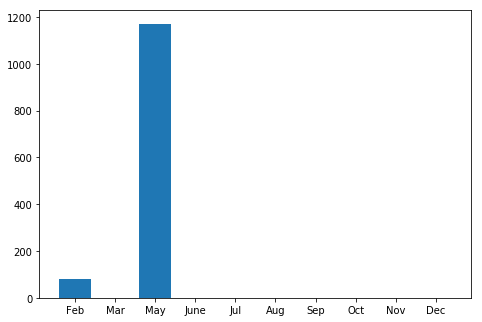

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

Bar graph showing which months have the most special day user transaction attempts

In [10]:
revenue_sp_success = {'Feb':0,'Mar':0,'May':0,'June':0,'Jul':0,'Aug':0,'Sep':0,'Oct':0,'Nov':0,'Dec':0}
for ind,row in df[df['SpecialDay']>0].iterrows():
    if row['Revenue']==True:
        revenue_sp_success[row['Month']]+=1

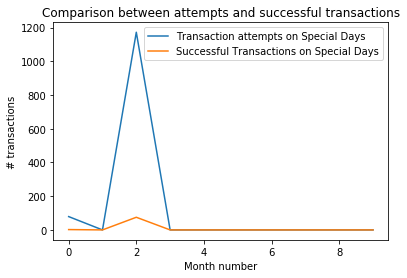

In [11]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(y,label = "Transaction attempts on Special Days")
ax.plot(list(revenue_sp_success.values()), label = "Successful Transactions on Special Days")
ax.legend()
ax.set_title("Comparison between attempts and successful transactions")
ax.set_xlabel("Month number")
ax.set_ylabel("# transactions")
plt.show()

In [12]:
c=0
region_false = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
region_true = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for _,row in df.iterrows():
    if row['PageValues']>0.0 and row['Revenue']!=True:
        c+=1
    if row['Revenue']==False:
        region_false[row['Region']]+=1
    if row['Revenue']:
        region_true[row['Region']]+=1

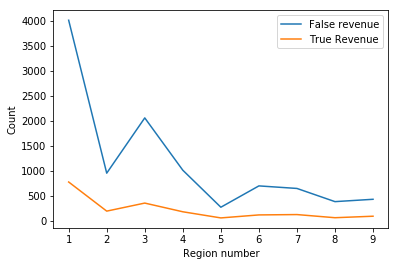

In [13]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(region_false.keys(),list(region_false.values()),label = "False revenue")
ax.plot(region_true.keys(),list(region_true.values()),label = "True Revenue")
ax.set_xlabel('Region number')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Page values have a certain value associated with them since a succeeding page may generate revenue. Let us analyze how many og the non zero valued pages generate successful revenues

In [14]:
pagevalue_revTNZ = 0 #counts number of sessions where non zero(NZ) page value results in True(T) Revenue
pagevalue_revFNZ = 0 #counts number of sessions where non zero(NZ) page value results in False(F) Revenue
pagevalue_revTZ = 0 #counts number of sessions where zero(NZ) page value results in True(T) Revenue
pagevalue_revFZ = 0 #counts number of sessions where zero(NZ) page value results in False(F) Revenue
for _,row in df.iterrows():
    if row['PageValues']>0:
        if row['Revenue']==True:
            pagevalue_revTNZ+=1
        elif row['Revenue']==False:
            pagevalue_revFNZ+=1
    else:
        if row['Revenue']==True:
            pagevalue_revTZ+=1
        elif row['Revenue']==False:
            pagevalue_revFZ+=1

In [15]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [16]:
a = pagevalue_revTZ/df['Revenue'].value_counts()[1]
b = pagevalue_revTNZ/df['Revenue'].value_counts()[1]

Fraction of zero valued pages that result in True revenues: 0.19392033542976939

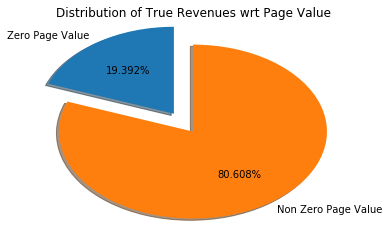

In [17]:
plt.pie([a,b],labels = ['Zero Page Value','Non Zero Page Value'],explode = [0.25,0],autopct='%1.3f%%',shadow = True,
        startangle = 90)
plt.title('Distribution of True Revenues wrt Page Value')
plt.show()

In [18]:
df[(df.Revenue==True) & (df.Region==3) & (df.SpecialDay > 0.0)]['OperatingSystems'].value_counts()

2    7
4    1
1    1
Name: OperatingSystems, dtype: int64

In [19]:
df[(df.Revenue==True)&(df.SpecialDay>0.0)]['OperatingSystems'].value_counts()

2    51
3    13
1    10
4     2
6     1
Name: OperatingSystems, dtype: int64

In [20]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [21]:
# temp = standardize('ProductRelated_Duration')
# df['ProductRelated_Duration'] = temp
# df['ProductRelated_Duration']

In [22]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [23]:
df.groupby(['VisitorType','Revenue']).count()

Administrative  Administrative_Duration  \
VisitorType       Revenue                                            
New_Visitor       False              1272                     1272   
                  True                422                      422   
Other             False                69                       69   
                  True                 16                       16   
Returning_Visitor False              9081                     9081   
                  True               1470                     1470   

                           Informational  Informational_Duration  \
VisitorType       Revenue                                          
New_Visitor       False             1272                    1272   
                  True               422                     422   
Other             False               69                      69   
                  True                16                      16   
Returning_Visitor False             9081                    9081   
                  True              1470                    1470   

                           ProductRelated  ProductRelated_Duration  \
VisitorType       Revenue                                            
New_Visitor       False              1272                     1272   
                  True                422                      422   
Other             False                69                       69   
                  True                 16                       16   
Returning_Visitor False              9081                     9081   
                  True               1470                     1470   

                           BounceRates  ExitRates  PageValues  SpecialDay  \
VisitorType       Revenue                                                   
New_Visitor       False           1272       1272        1272        1272   
                  True             422        422         422         422   
Other             False             69         69          69          69   
                  True              16         16          16          16   
Returning_Visitor False           9081       9081        9081        9081   
                  True            1470       1470        1470        1470   

                           Month  OperatingSystems  Browser  Region  \
VisitorType       Revenue                                             
New_Visitor       False     1272              1272     1272    1272   
                  True       422               422      422     422   
Other             False       69                69       69      69   
                  True        16                16       16      16   
Returning_Visitor False     9081              9081     9081    9081   
                  True      1470              1470     1470    1470   

                           TrafficType  Weekend  
VisitorType       Revenue                        
New_Visitor       False           1272     1272  
                  True             422      422  
Other             False             69       69  
                  True              16       16  
Returning_Visitor False           9081     9081  
                  True            1470     1470

In [24]:
for x in range(0,10,2):
    print(x)

0
2
4
6
8


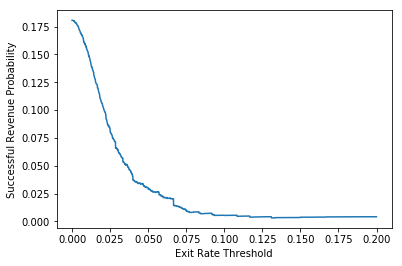

In [25]:
def revenue_probab(threshold):
    count_true = 0
    count_false = 0
    for ind,row in df.iterrows():
        if row['ExitRates']>threshold:
            if row.Revenue == True:
                count_true+=1
            else:
                count_false+=1
    return (count_true/count_false)
time = []
scores = []
for i in np.arange(0,0.2,0.0001):
    time.append(i)
    scores.append(revenue_probab(i))
plt.plot(np.array(time),np.array(scores))
plt.xlabel('Exit Rate Threshold')
plt.ylabel('Successful Revenue Probability')
plt.show()

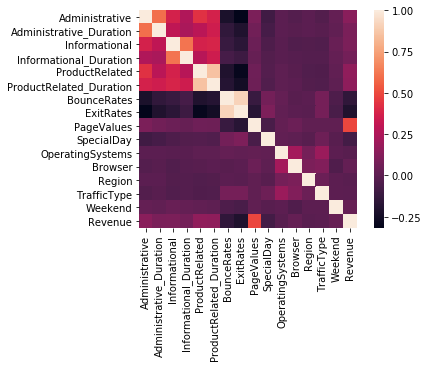

In [26]:
cor = df.corr()
sns.heatmap(cor,square = True)
plt.show()

In [27]:
labels = df['Revenue']
df.drop(columns = ['Revenue'],inplace = True)

In [28]:
df_2 = pd.get_dummies(df,columns = ['VisitorType','Month'])

In [29]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 28 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
OperatingSystems                 12330 non-null int64
Browser                          12330 non-null int64
Region                           12330 non-null int64
TrafficType                      12330 non-null int64
Weekend                          12330 non-null bool
VisitorType_New_Visitor          12330 non-null uint8
VisitorType_Ot

In [30]:
cor = df_2.corr()

In [31]:
#Using SelectKBest library to select the best K features based on chi square scores
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

top_feats = SelectKBest(score_func = chi2, k = 10)
fit = top_feats.fit(df_2,labels)
scores = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(df_2.columns)
feat_scores = pd.concat([cols,scores],axis = 1)
feat_scores.columns = ['Features','Chi-2 score']
print(feat_scores.nlargest(10,'Chi-2 score'))

                   Features    Chi-2 score
5   ProductRelated_Duration  877404.339415
8                PageValues  175126.808512
1   Administrative_Duration   41754.836841
3    Informational_Duration   35059.775770
4            ProductRelated   19317.285376
0            Administrative    1133.965531
2             Informational     357.981605
25                Month_Nov     223.548231
15  VisitorType_New_Visitor     115.339482
24                Month_May      54.997108


In [32]:
df_2 = df_2[['ProductRelated_Duration','PageValues','Administrative_Duration','Informational_Duration','ProductRelated'
            ,'Administrative','Informational','Month_Nov','VisitorType_New_Visitor','Month_May','BounceRates','ExitRates','TrafficType']]

In [33]:
#divide data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_2, labels, test_size=0.4, random_state=50)

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
predicted_NB = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_NB, target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.92      0.91      0.91      4180
        True       0.52      0.53      0.52       752

    accuracy                           0.85      4932
   macro avg       0.72      0.72      0.72      4932
weighted avg       0.85      0.85      0.85      4932



In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=True,class_weight=None,criterion='entropy',
                                                    max_depth= 10,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=5,
                                                    min_samples_split=5,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=300,
                                                    n_jobs=None,)
clf.fit(X_train, y_train)
predicted_RF = clf.predict(X_test)

In [38]:
print(classification_report(y_test, predicted_RF, target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.93      0.96      0.95      4180
        True       0.73      0.60      0.66       752

    accuracy                           0.91      4932
   macro avg       0.83      0.78      0.80      4932
weighted avg       0.90      0.91      0.90      4932



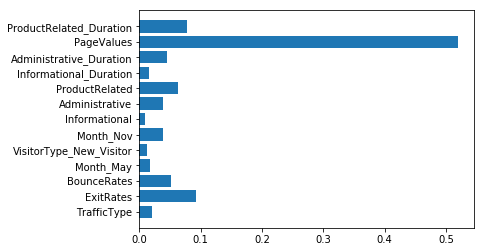

In [39]:
fig = plt.figure()
ax = plt.subplot(111)
ax.barh(np.arange(13),clf.feature_importances_)
ax.set_yticks(np.arange(13))
ax.set_yticklabels(list(df_2.columns))
ax.invert_yaxis()
plt.show()

In [40]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=300,learning_rate = 0.6)
clf.fit(X_train, y_train)
predicted_AB = clf.predict(X_test)

In [41]:
print(classification_report(y_test, predicted_AB, target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.93      0.95      0.94      4180
        True       0.67      0.58      0.62       752

    accuracy                           0.89      4932
   macro avg       0.80      0.77      0.78      4932
weighted avg       0.89      0.89      0.89      4932



In [42]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test,predicted_AB,beta = 0.1)

0.6712647524029687

In [43]:
# !pip install imblearn --user

In [44]:
# from imblearn.over_sampling import SMOTE

In [45]:
import xgboost as xgb

xg_reg = xgb.XGBClassifier(objective ='binary:hinge', colsample_bytree = 0.3, learning_rate = 0.45,
                max_depth = 10, alpha = 10, n_estimators = 300)
xg_reg.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.45, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
preds = xg_reg.predict(X_test)

In [47]:
print(classification_report(y_test, preds, target_names=['False','True'])[0])

In [48]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel = 'rbf')
clf.fit(X_train, y_train)
pred_SV = clf.predict(X_test)

In [49]:
print(classification_report(y_test, pred_SV, target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92      4180
        True       0.00      0.00      0.00       752

    accuracy                           0.85      4932
   macro avg       0.42      0.50      0.46      4932
weighted avg       0.72      0.85      0.78      4932



In [50]:
def standardize(column):
    mean = np.mean(column)
    stddev = np.std(column)
    temp = pd.Series([(column[ind]-mean)/stddev for ind in range(len(column))])
    return temp

In [51]:
temp = pd.DataFrame(standardize(list(df['BounceRates'])))
temp['ExitRates'] = standardize(list(df['ExitRates']))
temp.columns = ['BounceRates','ExitRates']

In [52]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 0.5, min_samples = 10).fit(temp)

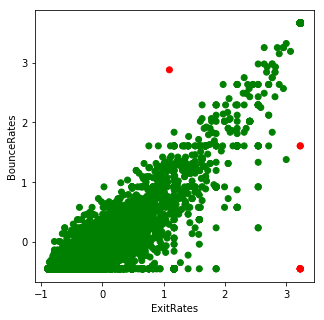

In [53]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
colours = {} 
colours[-1] = 'r'
colours[0] = 'g'
colours[1] = 'b'
colours[2] = 'y'
colours[3] = 'k'
cvec = [colours[label] for label in labels]
plt.figure(figsize =(5, 5)) 
plt.scatter(temp['ExitRates'],temp['BounceRates'], c = cvec) 
plt.xlabel('ExitRates')
plt.ylabel('BounceRates')
plt.show()

In [54]:
np.unique(labels)

array([-1,  0], dtype=int64)

In [55]:
df_2.columns

Index(['ProductRelated_Duration', 'PageValues', 'Administrative_Duration',
       'Informational_Duration', 'ProductRelated', 'Administrative',
       'Informational', 'Month_Nov', 'VisitorType_New_Visitor', 'Month_May',
       'BounceRates', 'ExitRates', 'TrafficType'],
      dtype='object')

In [56]:
temp = pd.DataFrame(standardize(list(df['ExitRates'])))
temp['BounceRates'] = standardize(list(df['BounceRates']))
temp.columns = ['ExitRates','BounceRates']

In [57]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = .5, min_samples = 30).fit(temp)

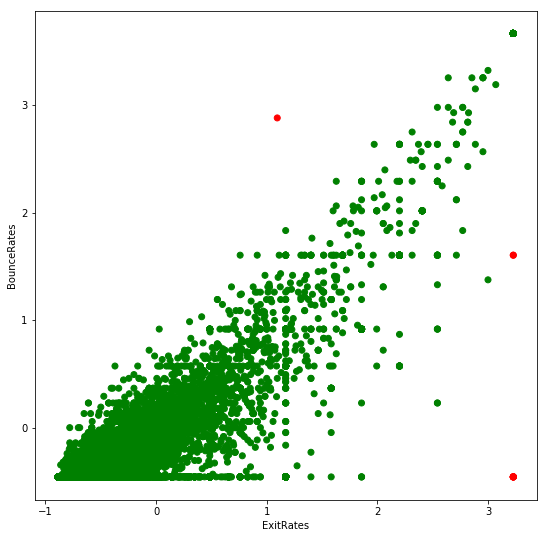

In [58]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
colours = {} 
colours[-1] = 'r'
colours[0] = 'g'
cvec = [colours[label] for label in labels]
plt.figure(figsize =(9, 9)) 
plt.scatter(temp['ExitRates'],temp['BounceRates'], c = cvec) 
plt.xlabel('ExitRates')
plt.ylabel('BounceRates')
plt.show()